<a href="https://colab.research.google.com/github/rajni-arora/NLP/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

A few types of classification:

*Binary Classification

*Multilabel Classification

*Multiclass Classification


# **Steps in modelling**

1. Create or immport the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate



# **Creating data to View and Fit**

In [ ]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000

#Create circles
X, y  = make_circles(n_samples,
                     noise = 0.03,
                     random_state=42)

In [ ]:
#Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:

# Check the labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
##Visualize 
#Creating a Dataframe

import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


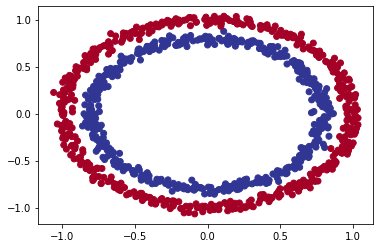

In [ ]:
#Visualize with the Plot

import matplotlib.pyplot as plt

plt.scatter(X[:, 0],  X[:, 1], c=y, cmap = plt.cm.RdYlBu);

In [ ]:
#Check the shape of our features and labels
# Feature = X , label = y
# (Row, Column)
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples we are working
len(X), len(y)

(1000, 1000)

In [ ]:
import tensorflow as tf

In [ ]:
#To always get the same random no
#Set the random seed

tf.random.set_seed(42)

#  1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#  3. Fit the model
model_1.fit(X, y, epochs = 5)


Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


Accuracy is very low

In [ ]:
#Let's try and imporve our model by training for londer...
model_1.fit(X, y, epochs = 200, verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

# Getting accuracy around 50% 
# So lets add an extra layer.

In [ ]:
tf.random.set_seed(42)

# Create the model using 2 layers 
model_2 = tf.keras.Sequential([
                               
tf.keras.layers.Dense(1),
tf.keras.layers.Dense(1)

])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#Fit the model
model_2.fit(X,y, epochs = 100, verbose = 0) 

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# **Improving our model**

1. Create a model - Add more no of layers or increase the no of hidden units within a layer

2. Compile a model - Choose a different optimizer function such as Adam instead of SGD()

3. Fit a model - train longer or for more no of eochs


In [ ]:
tf.random.set_seed(42)

# Create the model using 2 layers 
model_3 = tf.keras.Sequential([

# Hidden layer of 100 units                         
tf.keras.layers.Dense(100),

# Hidden layer of 10 units  
tf.keras.layers.Dense(10),

tf.keras.layers.Dense(1)

])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
model_3.fit(X,y, epochs = 100, verbose = 0) 



In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

Still Getting 50% Accuracy

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.predict(X)

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ],
       [0.5148492 ],
       [0.53087693],
       [0.5643773 ],
       [0.45787305],
       [0.45052725],
       [0.46129915],
       [0.54055846],
       [0.46380937],
       [0.54798055],
       [0.50375706],
       [0.50630444],
       [0.58775467],
       [0.45902476],
       [0.4912331 ],
       [0.5832161 ],
       [0.57042587],
       [0.5523935 ],
       [0.4631735 ],
       [0.4577342 ],
       [0.4544098 ],
       [0.47872254],
       [0.57856053],
       [0.55546165],
       [0.46339142],
       [0.45849174],
       [0.589867  ],
       [0.57247376],
       [0.529744  ],
       [0.45870548],
       [0.51092875],
       [0.49994174],
       [0.5463086 ],
       [0.5109905 ],
       [0.45797244],
       [0.52232754],
       [0.53888047],
       [0.44872287],
       [0.544

To visualize our model's prediction, lets create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, features(X), and labels(Y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as the lines between zones(where each unique class falls)

This function is inspired by two resources:
1. "https://cs231n.github.io/neural-networks-case-study/"

2. "https://github.com/GokuMohandas/MadeWithML"

3. "https://madewithml.com/courses/foundations/neural-networks/"

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  
  #Create a meshgrid of the different X values
  x_in = np.c_[xx.ravel(), yy.ravel()] #numpy.c = stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get ready for plotting
    y_pred = np.argmax(y_pred).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



doing binary classification


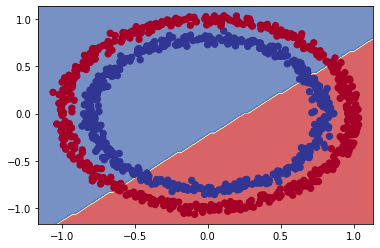

In [ ]:
#Prediction
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

# **Imp Note** :  This is why our model is performing so poorly, 

# It is tring to draw straight line thru the data, But our data is Circular
# So our data cant be seperate by the straight line

We are just adding Linear layers and getting straight line. To work on Circular data we have to add Non- Linearity

By adding Activation Function - AF adds Non-linearity in the model

Add Non-linear AF

# **Types of Activation Function**

A. Binary step function

B. Linear function

C. Non linear activation function

      * Sigmoid Function
      * Tanh
      * Softmax
      * Softsign
      * ReLU
      * ELUs 
    

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([

# "tf.keras.activations.linear": Linear activation function                             
tf.keras.layers.Dense(1, activation = tf.keras.activations.linear) 

])

#2. Compile the model
model_4.compile( loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y , epochs = 100, verbose = 0)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Visualize Orignal vs Prediction

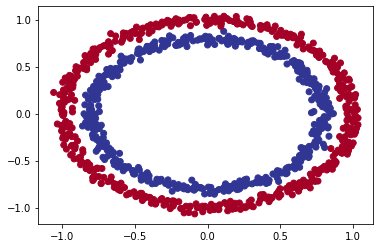

In [ ]:
#Check out our data

#Visualization

#Orignal Data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


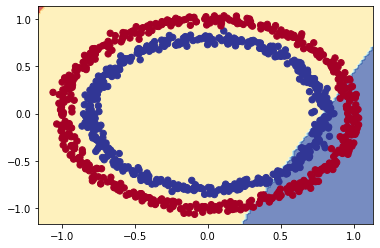

In [ ]:
#Prediction for model_4

plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

Our model still predicting straight line

## **1. First model of Non-linear:**  Build our first neural network with a non-linear activation function

In [ ]:
#set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation function
model_5 = tf.keras.Sequential([                              
 tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"]

)

#3. Fit the model 
history = model_5.fit(X,y, epochs=100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


doing binary classification


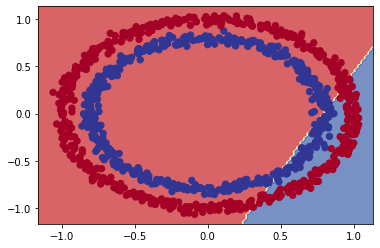

In [ ]:
#Prediction for model_5

plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

# **2. Non - linear model :** Multilayer Neural Network

# Creating Neural Network with:

Hidden Layer : 2

Neuron : 4 neuron per hidden layer

Learning rate : 0.001

Activation Function : ReLU



In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
tf.keras.layers.Dense(4, activation = "relu"),
tf.keras.layers.Dense(4, activation = "relu"),
tf.keras.layers.Dense(1)
])

#2 Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"]
)

# fit the model
history = model_6.fit(X, y, epochs = 250, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


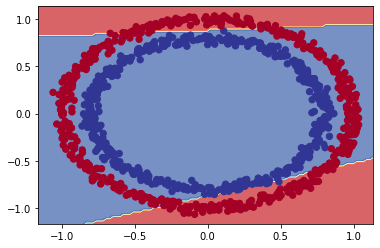

In [ ]:
#Prediction for model_6

plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

Still low accuracy.

So this time will add Activation function in output layer "softmax"
previously we are adding only in the Hidden layer

# **3. Non - linear model :** Multilayer Neural Network (With activation function in output layer)

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
tf.keras.layers.Dense(4, activation = "relu"),
tf.keras.layers.Dense(4, activation = "relu"),
tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2 Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"]
)

# fit the model
history = model_7.fit(X, y, epochs = 250, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classification


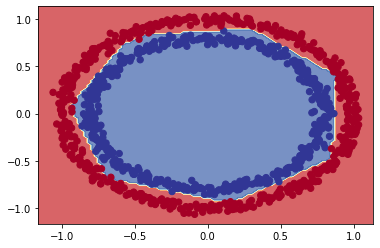

In [ ]:
#Prediction for model_7

plot_decision_boundary(model = model_7,
                       X=X,
                       y=y)

Yayyyy !!!

So, our model perfectly find the Decision boundary between Red and Blue line.

# **-----Linear and Non-Linear Activation function for understanding only--------**

# Simple numpy Array

In [ ]:
#Create a toy tensor

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

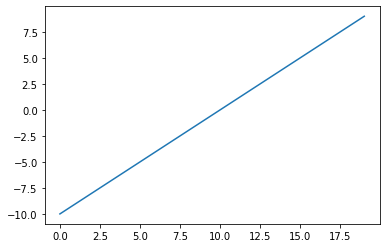

In [ ]:
#Visualize the toy tensor
plt.plot(A)

# Sigmoid

In [ ]:
#replicating sigmoid -> 1 / (1 + exp(-x))

def sigmoid(x):
  return 1/ (1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

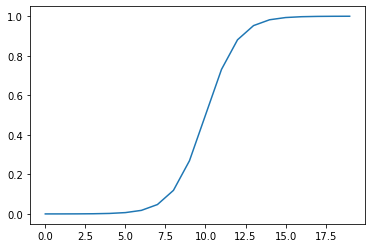

In [ ]:
#Visualize
plt.plot(sigmoid(A))

This line previously be straight, Now non straight

# ReLU

In [ ]:
#Lets recreate reLU

def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

 Note : It converts -ve to 0

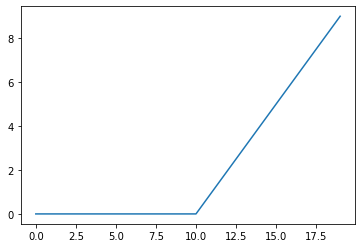

In [ ]:
plt.plot(relu(A))

Try Linear Activation function
# Linear

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

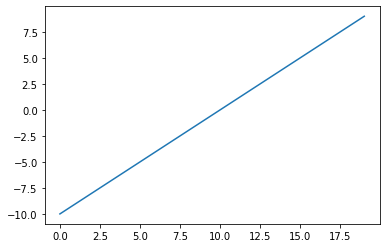

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#Check orignal A and Linear(A)
A ==  tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

All the values are true. No change

# **Conclusion** : **The missing piece : Non - Linearity**

# In linear -  it is passing the same input data always and result will be same in above even if we are adding more layers

# Non - linear - it is passing the diff data every time

#**------------------------------------------------------------------------**

# **Evaluating and Improving our Above Classification with TRAIN and TEST Split**

Previously we have been training and testing on the same dataset

Now

Create Training and test set

In [ ]:
len(X)

1000

In [ ]:
# Split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test , y_test = X[:800], y[:800]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (800, 2), (800,))

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")

                               
])

# 2. Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 25, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Evaluate the model on the test dataset
model_8.evaluate(X_test,y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9875


[0.13001199066638947, 0.987500011920929]

doing binary classification
doing binary classification


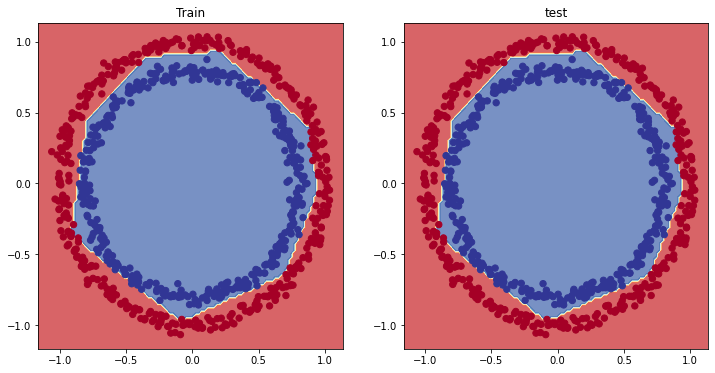

In [ ]:
#Prediction for model_8

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

# **Plot the loss(or training) curves**

In [ ]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264281272888184,
  0.6038310527801514,
  0.5714036226272583,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.25971999764442444,
  0.23746901750564575,
  0.21351958

In [ ]:
# Convert the history object into a Dataframe 
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

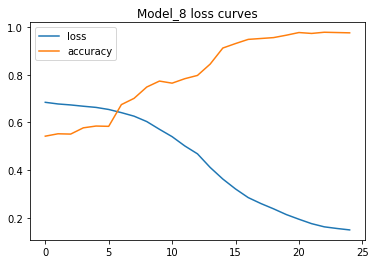

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


Accuracy metric is going up

loss metric is going down

# Finding the best learning rate

To find the ideal learning rate, where the loss decreases the most during training

Use the following steps:

1. A learning rate **callback** - it is an extra functionality, you can add while training

2. Another model

3. A modified loss curves plot.

In [ ]:
# set random seed
tf.random.set_seed(42)

#create the model

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")

])

#Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20)) #startinglearning rate with 1e-4 then slowly increasing with *10**(epoch/20)

#Fit the model
history_9 = model_9.fit(X_train, 
                        y_train, 
                        epochs=100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

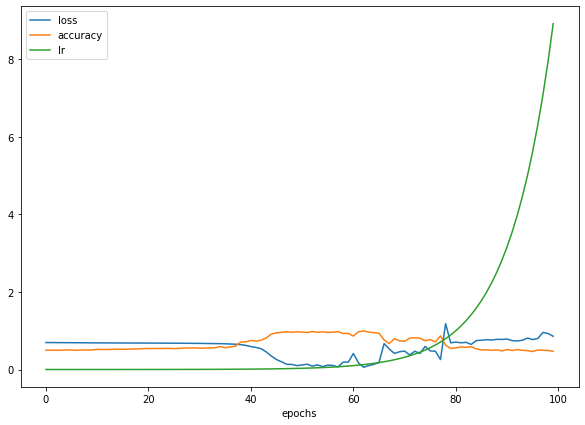

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = "epochs");

learning rate increasing when epochs increasing

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

#100 different values of learning rate

100

Text(0.5, 1.0, 'Learning rate vs Loass')

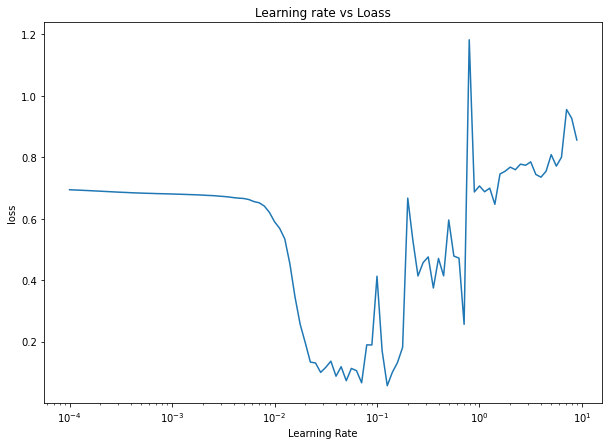

In [ ]:
#Visualize 
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"]) #semilogx = we want log on xaxis
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loass")


The ideal learning rate is where the loss is decreasing ()

In [ ]:
#Learning rate we used before (model_8)
10**-2

0.01

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

#set random seed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss = "binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(lr=0.02),
                  metrics = ["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========